In [16]:
#import necessary libraries
import os
import numpy as np
from numpy import mean,std 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot


#import libraries from sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from lightgbm import LGBMRegressor
from xgboost import XGBClassifier

from sklearn.ensemble import StackingClassifier
#from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
# PCA
from sklearn.decomposition import PCA

In [17]:
 # load dataset
 df = pd.read_csv("breast_cancer_data.csv")
 df = df.drop(['id','Unnamed: 32'], axis =1)
  
 diag_map = {'M':1, 'B':0}
 df['diagnosis'] = df['diagnosis'].map(diag_map)  
 
# get data
def get_dataset():
    # set X,y
    y = df['diagnosis']
   # print("y value initially : ", y)
    X = df.drop(['diagnosis'], axis = 1)
    
    # Scaler dataset without target
    sc = StandardScaler()
    X = sc.fit_transform(X)
   # y = sc.transform(y)
    #print("scaler X: ", X)
    #call PCA
    pca_breastX = pca_component(X)
    X = pca_breastX
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.35, random_state = 42)
    
    return X_train, X_test, Y_train, Y_test

#feature scaling
def get_scaler(X, y):
    
    sc = StandardScaler()
    X = sc.fit_transform(X)
    y = sc.transform(y)
   # print("after normalization: ",X_train.head())
    return X, y

# define PCA
def pca_component(X):
    
    pca_breast = PCA(n_components=8)
    pca_breast.fit(X)
    pca_breastX = pca_breast.fit_transform(X)
    print("PCA Variance : ",pca_breast.explained_variance_ratio_)
    pca_var = pca_breast.explained_variance_ratio_
    pca_var_cum = np.cumsum(np.round(pca_var, decimals=4))
    print("PCA cumsum : ",pca_var_cum*100)
   
    pyplot.plot(pca_var_cum)
    final_data = pca_breastX
    return final_data


def available_model():
    models = dict()
    models['lr'] = LogisticRegression(penalty='l2')
    models['svm'] = SVC(kernel='rbf', C = 100, gamma = 0.0001)
    models['knn'] = KNeighborsClassifier()
    models['decision_tree']= DecisionTreeClassifier()
    models['gaussian'] = GaussianNB()
    models['xgb'] = XGBClassifier(use_label_encoder=False)
    models['randomforest'] = RandomForestClassifier()
    models['adaboost'] = AdaBoostClassifier()
    
    return models

def plot_confusion_matrix(y_predict):
    con_matrix = confusion_matrix(Y_test, y_predict, labels=[0, 1])
  #  cm=metrics.confusion_matrix(y_test, y_predict_NB, labels=[1, 0])
    df_cm = pd.DataFrame(con_matrix, index = [i for i in ["0","1"]], columns = [i for i in ["benign","Malignant"]])
   
    sns.heatmap(df_cm, annot=True)
    pyplot.title(eva_model)
    pyplot.figure(figsize = (7,2))
    pyplot.show()

# evaluate a given model using cross-validation
def evaluate_model(eva_model, X, y):
        
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(eva_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
   
    model_fit = eva_model.fit(X, y)
    y_predict = model_fit.predict(X_test)
    
   # plot_confusion_matrix(y_predict)
    return scores, y_predict
    

PCA Variance :  [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724]
PCA cumsum :  [44.27 63.24 72.63 79.23 84.73 88.75 91.   92.59]
model name: LogisticRegression()
model name:  lr
accuracy: 
 99.41520467836257
Confusion Matrix 
 [[108   0]
 [  1  62]]
F1 score 
 99.36958525345622
Precision score 
 99.54128440366972
Recall score 
 99.20634920634922
model name: SVC(C=100, gamma=0.0001)
model name:  svm
accuracy: 
 98.83040935672514
Confusion Matrix 
 [[108   0]
 [  2  61]]
F1 score 
 98.73483279076649
Precision score 
 99.0909090909091
Recall score 
 98.41269841269842
model name: KNeighborsClassifier()
model name:  knn
accuracy: 
 96.49122807017544
Confusion Matrix 
 [[106   2]
 [  4  59]]
F1 score 
 96.2044983722995
Precision score 
 96.5424739195231
Recall score 
 95.89947089947091
model name: DecisionTreeClassifier()
model name:  decision_tree
accuracy: 
 93.56725146198829
Confusion Matrix 
 [[100   8]
 [  3  60]]
F1 score 
 93.1948916464672
Pre

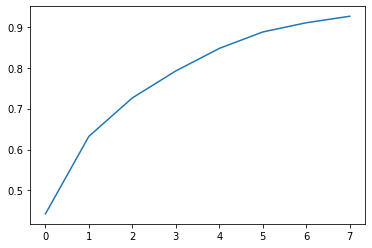

In [11]:
X_train, X_test, Y_train, Y_test = get_dataset()

#X_train, X_test = get_scaler(X_train, X_test)

models = available_model()
results, names, accuracy = list(), list(), list()

for name, eva_model in models.items():
    print("model name:", eva_model)
    scores, y_predict = evaluate_model(eva_model, X_train, Y_train)
    results.append(scores)
    names.append(name)
    accuracy.append(accuracy_score(Y_test, y_predict))
    print('model name: ',name)
   # print('>%s %.5f (%.3f)' % (name, mean(scores), std(scores)))
    print('accuracy: \n ' + str(accuracy_score(Y_test, y_predict)*100))
    print('Confusion Matrix \n ' + str(confusion_matrix(Y_test, y_predict)) )
    print('F1 score \n '+ str(f1_score(Y_test, y_predict, average="macro")*100) )
    print('Precision score \n '+ str(precision_score(Y_test, y_predict, average="macro")*100) )
    print('Recall score \n '+ str(recall_score(Y_test, y_predict, average="macro")*100) )    
   # plot_confusion_matrix(y_predict)

